* Adult Dataset

-> Import dependencies 

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

-> Import Data into the code

In [97]:
train = pd.read_csv('adult.data', header=None)
test = pd.read_csv('adult.test', skiprows=1,header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [98]:
print(train.shape)
print(test.shape)
print(train.info())

(32561, 15)
(16281, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


--> Edit the column names 


In [99]:
cols = [ 'Age','Workclass','Final Weight', 'Education',
        'Education Number of Years', 'Martial-status', 'Occupation',
        'Relationship', 'Race', 'Sex','Capital-gain', 'Capital-loss',
        'Hours-per-week', 'Native-country','income']

columns = dict(zip(train.columns, cols))
train= train.rename(columns=columns)
test= test.rename(columns=columns)


In [100]:
train.describe()

,Age,Final Weight,Education Number of Years,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


--> Split the Data


In [101]:
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

#categorical variables handling
temp = pd.concat([x_train,x_test], axis=0)
temp = pd.get_dummies(temp)

# train test split
x_train = temp[:x_train.shape[0]]
x_test = temp[x_train.shape[0]:]
print(x_train.shape, x_test.shape)

(32561, 108) (16281, 108)


--> Training Phase (experimenting with different models)

In [102]:
# Logistic Regression
logisticReg = LogisticRegression(solver='saga')
logisticReg.fit(x_train,y_train)
y_pred_lr = logisticReg.predict(x_test)

# handle a problem with the test data
y_test = [label.rstrip('. ') for label in y_test]
acc_lr = accuracy_score(y_test,y_pred_lr)
f1_lr  = f1_score(y_test,y_pred_lr, pos_label=' >50K')
print(f"accuracy for Logistic Regression: {acc_lr}" )
print(f"f1 score for Logistic Regression: {f1_lr}" )

accuracy for Logistic Regression: 0.7952828450340889
f1 score for Logistic Regression: 0.3031570144260924


c:\Users\NEGAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [103]:
# svm | SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc =svc.predict(x_test)

acc_svc = accuracy_score(y_test,y_pred_svc)
f1_svc  = f1_score(y_test,y_pred_svc, pos_label=' >50K')
print(f"accuracy for SVC: {acc_svc}" )
print(f"f1 score for SVC: {f1_svc}" )

accuracy for SVC: 0.7985995946194951
f1 score for SVC: 0.26331161536733316


In [104]:
# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn =knn.predict(x_test)

acc_knn = accuracy_score(y_test,y_pred_knn)
f1_knn  = f1_score(y_test,y_pred_knn, pos_label=' >50K')
print(f"accuracy for knn: {acc_knn}" )
print(f"f1 score for knn: {f1_knn}" )

accuracy for knn: 0.776733615871261
f1 score for knn: 0.40497626452774593


In [105]:
# Random Forest
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_RF = RF.predict(x_test)

acc_RF = accuracy_score(y_test,y_pred_RF)
f1_RF  = f1_score(y_test,y_pred_RF, pos_label=' >50K')
print(f"accuracy for Random Forest: {acc_RF}" )
print(f"f1 score for Random Forest: {f1_RF}" )

accuracy for Random Forest: 0.8519132731404705
f1 score for Random Forest: 0.660661505981703


In [106]:
# XGBoost Classifier
xgb = XGBClassifier()
# Convert labels to numeric values
LabelEnc = LabelEncoder()
y_train = LabelEnc.fit_transform(y_train)
y_test = LabelEnc.transform(y_test)
xgb.fit(x_train,y_train)
y_pred_xgb =xgb.predict(x_test)

acc_xgb = accuracy_score(y_test,y_pred_xgb)
f1_xgb  = f1_score(y_test,y_pred_xgb)
print(f"accuracy for XGBoost: {acc_xgb}" )
print(f"f1 score for XGBoost: {f1_xgb}" )

accuracy for XGBoost: 0.8729807751366624
f1 score for XGBoost: 0.7098765432098766


--> All in a Data Frame

In [109]:
metric_df = pd.DataFrame(
    {'Model': ['logisticReg','svc','knn','RF','xgb'],
    'Accuracy': [acc_lr, acc_svc, acc_knn, acc_RF, acc_xgb],
    'Fscore': [f1_lr, f1_svc, f1_knn, f1_RF, f1_xgb]}
)

metric_df

,Model,Accuracy,Fscore
0,logisticReg,0.795283,0.303157
1,svc,0.798600,0.263312
2,knn,0.776734,0.404976
3,RF,0.851913,0.660662
4,xgb,0.872981,0.709877


--> Visualization

<Axes: xlabel='Model'>

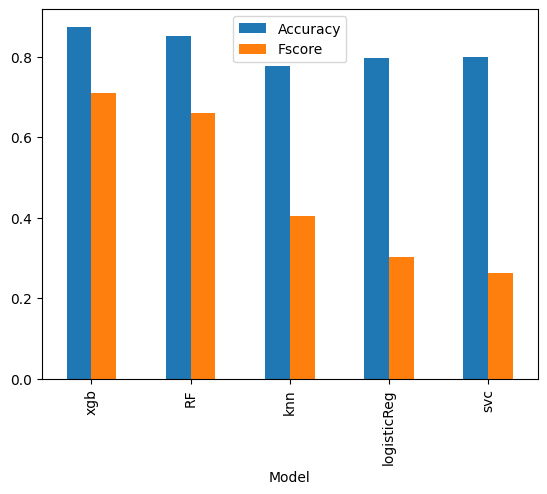

In [117]:
metric_df = metric_df.sort_values('Fscore',ascending=False)
metric_df.plot(kind='bar',x='Model',y=['Accuracy','Fscore'])